# Deep learning for freehand sketch object recognition 

## Our model design

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint

# dimensions of our images.
img_width, img_height = 250, 250

train_data_dir = 'png'
validation_data_dir = 'C:\Users\suhag\Desktop\CS 4514 Project\dataset\sketches_png\png'
nb_train_samples = 20000
nb_validation_samples = 800
nb_epoch = 150

# checkpoint
"""
    save model weights when validation accuracy increases during training
"""
filepath="bestWeight.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

from keras.models import Model
from keras.layers import (
    Input,
    Dense,
    Dropout,
    Flatten,
    merge,
    Lambda
)
from keras.layers.convolutional import (
    Convolution2D,
    MaxPooling2D,
    AveragePooling2D,
    ZeroPadding2D
)
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import keras.backend as K
input = Input(shape=(3, 250, 250))

layer1_conv_1 = Convolution2D(64, 15, 15,subsample=(3, 3),activation='relu')(input)
layer1_pool_1 = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(layer1_conv_1)

layer2_conv_1 = Convolution2D(128, 5, 5,subsample=(1, 1),activation='relu')(layer1_pool_1)
layer2_pool_1 = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(layer2_conv_1)

layer3_conv_1 = Convolution2D(256, 5, 5,subsample=(1, 1),activation='relu')(layer2_pool_1)
layer3_pool_1 = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(layer3_conv_1)

#tower A
sparse_conv_a1 = Convolution2D(48, 1, 1)(layer3_pool_1)
sparse_conv_a2 = Convolution2D(64, 3, 3)(sparse_conv_a1)


# Tower B
sparse_pool_b1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(layer3_pool_1)
sparse_conv_b2 = Convolution2D(64, 1, 1)(sparse_pool_b1)

# Tower C
sparse_conv_c1 = Convolution2D(64, 3, 3)(layer3_pool_1)

merge_layer = merge([sparse_conv_a2, sparse_conv_b2, sparse_conv_c1], mode='concat', concat_axis=1)

layer5_pool_1 = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(merge_layer)
flat = Flatten()(layer5_pool_1)
fc1 = Dense(256, activation='relu')(flat)
dr = Dropout(0.5)(fc1)
fc2 = Dense(250, activation='sigmoid')(dr)
model = Model(input,fc2)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# print model summary 
model.summary()

## training function 
# history = model.fit_generator(
#         train_generator,
#         callbacks=callbacks_list,
#         samples_per_epoch=nb_train_samples,
#         nb_epoch=nb_epoch,
#         verbose=0,
#         validation_data=validation_generator,
#         nb_val_samples=nb_validation_samples)

Using Theano backend.
C:\Anaconda2\lib\site-packages\keras\backend\theano_backend.py:1237: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
C:\Anaconda2\lib\site-packages\keras\backend\theano_backend.py:1237: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
C:\Anaconda2\lib\site-packages\keras\backend\theano_backend.py:1237: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')
C:\Anaconda2\lib\site-packages\keras\backend\theano_backend.py:1242: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='average_exc_pad')
C:\Anaconda2\lib\site-packages\keras\backend\theano_backend.py:1242: UserWarning: DEPRECATION: the 'st' paramete

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 250, 250)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 79, 79)    43264       input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 64, 39, 39)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 128, 35, 35)   204928      maxpooling2d_1[0][0]             
___________________________________________________________________________________________

<h3>Model design</h3>

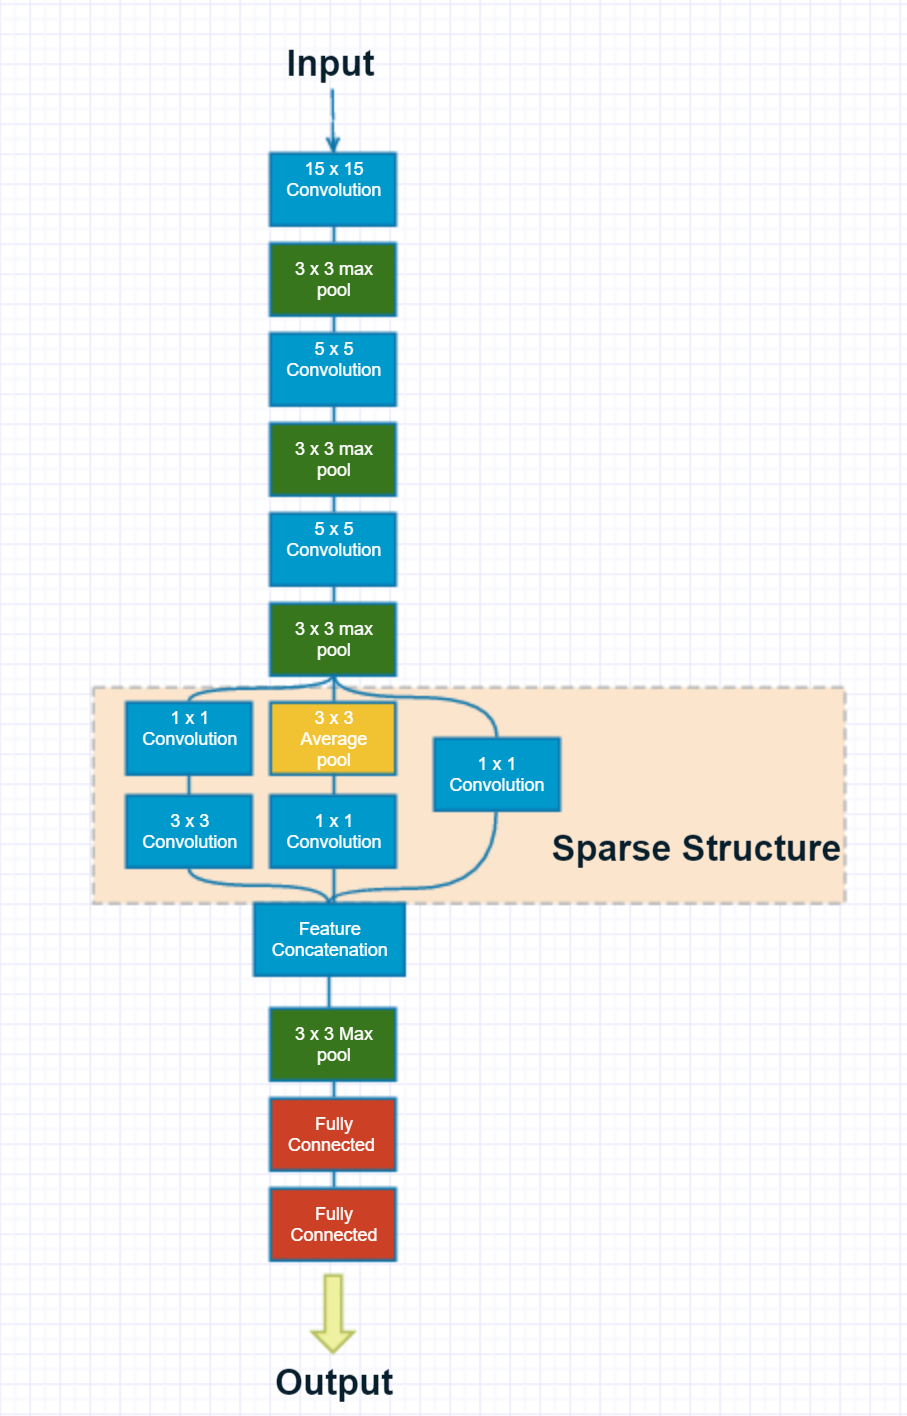

In [42]:
from PIL import Image
im1 = Image.open('modelDesign.png')
im1 = im1.convert('RGB')
im1

## Plot Training history  

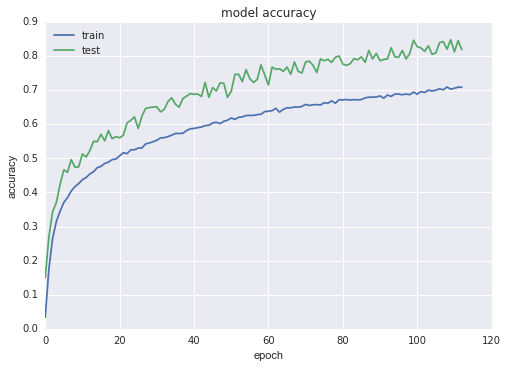

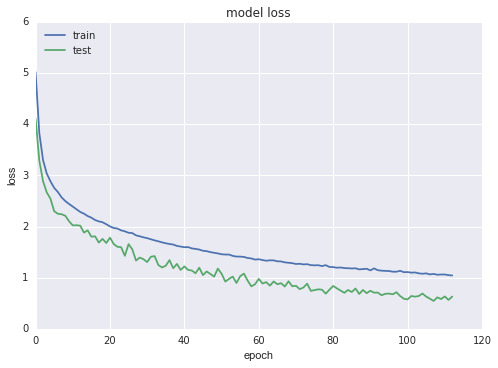

In [3]:
import matplotlib.pyplot as plt
import numpy
import seaborn
import pandas as pd
## load the stored training history
df = pd.read_csv('modelHistory.csv')
# summarize history for accuracy
plt.plot(df['Accuracy'].tolist())
plt.plot(df['val_acc'].tolist())
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(df['loss'].tolist())
plt.plot(df['val_loss'].tolist())
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Load model weights 

In [6]:
model.load_weights('bestWeight.hdf5')

## Test model prediction

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint

# dimensions of our images.
img_width, img_height = 250, 250
test_data_dir = 'C:\Users\suhag\Desktop\CS 4514 Project\dataset\test\png'

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode= 'sparse')



Found 20000 images belonging to 250 classes.


In [8]:
## load the file containing the different category list

import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
df2 = pd.read_csv('C:\Users\suhag\Desktop\CS 4514 Project\dataset\scene dataset\ground truth\labels.csv', 
        header=0)
target_names = df2['Category'].tolist()

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(target_names)
encoded_Y = encoder.transform(target_names)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
predict = []
X=[]
Y=[]
i= 0

## predict all the images in TU-Berlin sketch dataset
# for x,y in test_generator:
#     X.extend(x)
#     predict.extend(model.predict_classes(x))
#     Y.extend(y)
#     i= i+32
#     if(i>=20000):
#         break

## predict a sample of 32 sketch objects randomly selected each time
for x,y in test_generator:
    X.extend(x)
    predict.extend(model.predict_classes(x))
    Y.extend(y)
    break
# for verification print the true label and the predict label
# print Y
# print predict

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


32/32 [==============================] - 1s


In [10]:
## convert the sparse integers into text label format
p = (encoder.inverse_transform(predict))
tr= (encoder.inverse_transform(Y))

## the prediction into a csv file for later analysis
# df = pd.DataFrame(
#     {'true_label': tr,
#      'predicted': p
#     })
# df.to_csv('modelPredict.csv', sep=',')

In [11]:
## plot the confusion matrix for the following model and store in system 
import os,sys
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(tr,p)
import sys
orig_stdout = sys.stdout
f = open('out.txt', 'w')
sys.stdout = f
cm.print_stats()
sys.stdout = orig_stdout
f.close()

## Plot subset results

In [30]:
p = (encoder.inverse_transform(predict))
tr= (encoder.inverse_transform(Y))
from matplotlib import pyplot
from scipy.misc import toimage
for i in range(0, 32):
    fig=pyplot.gcf()
    fig.set_size_inches(100,100)
    pyplot.subplots_adjust(left=0, right=1, bottom=0, top=1)
    pyplot.subplot(8,4, i + 1)
    pyplot.imshow(toimage(X[i]))
    pyplot.axis("off")
    if(tr[i]==p[i]):
        pyplot.text(0, 0, tr[i], fontsize=150, color='green')
    else:
        pyplot.text(0, 0, "Truth:" + tr[i], fontsize=150, color='blue')
        pyplot.text(0, 30, "Predicted: " + p[i], fontsize=150, color='red')

# show the plot
pyplot.show()

## False negative prediction

5


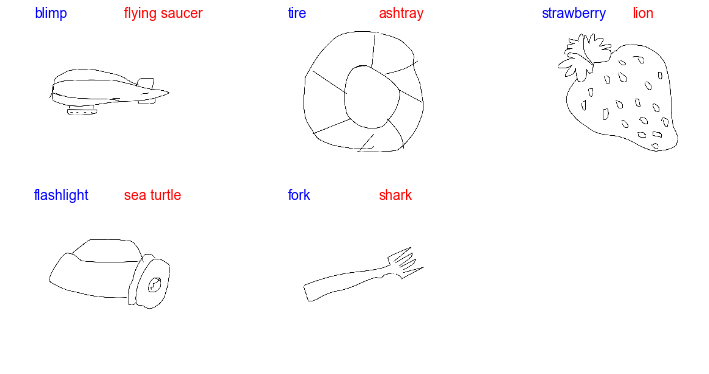

In [31]:
test_wrong = [im for im in zip(X,p,tr) if im[1] != im[2]]
print len(test_wrong)
for ind, val in enumerate(test_wrong[:100]):
    fig=pyplot.gcf()
    fig.set_size_inches(10,50)
    pyplot.subplots_adjust(left=0, right=1, bottom=0, top=1)
    pyplot.subplot(20,3 , ind + 1)
    pyplot.imshow(toimage(val[0]))
    pyplot.axis("off")
    pyplot.text(0, 0, val[2], fontsize=14, color='blue')
    pyplot.text(150, 0, val[1], fontsize=14, color='red')
# show the plot
pyplot.show()

## True positive predictions

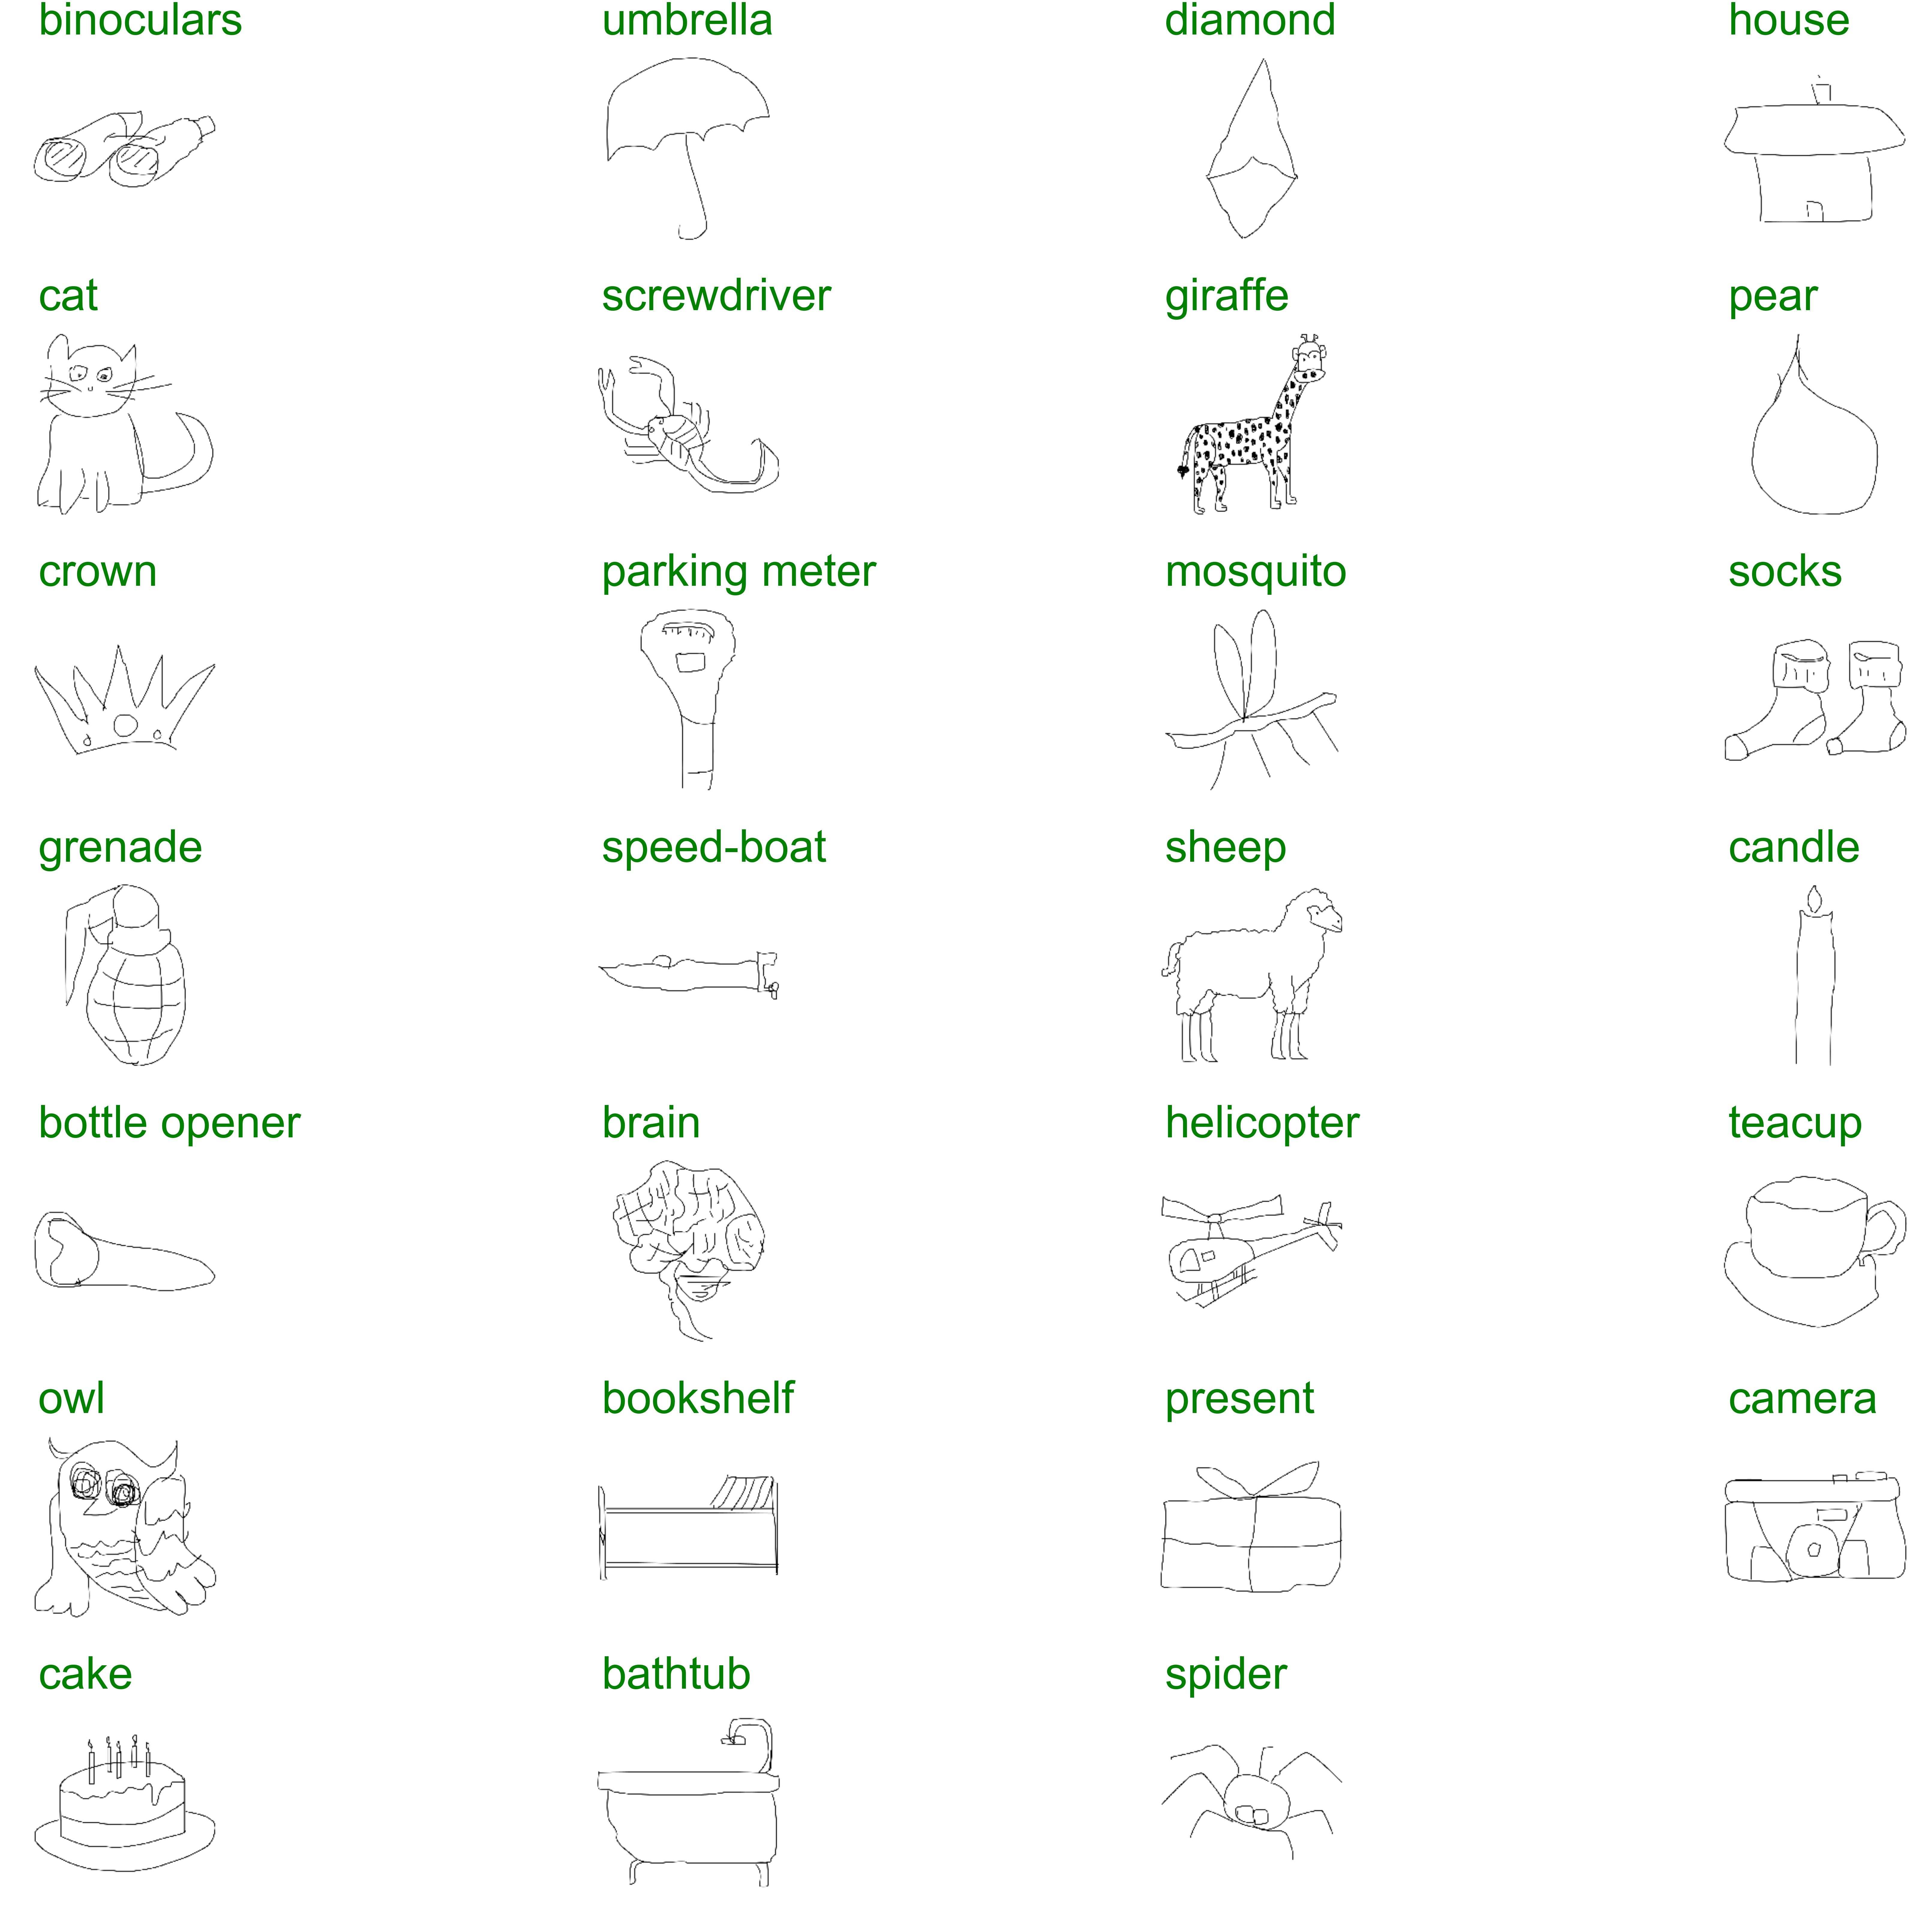

In [34]:
test_correct = [im for im in zip(X,p,tr) if im[1] == im[2]]
for ind, val in enumerate(test_correct[:100]):
    fig=pyplot.gcf()
    fig.set_size_inches(100,100)
    pyplot.subplots_adjust(left=0, right=1, bottom=0, top=1)
    pyplot.subplot(8,4, ind + 1)
    pyplot.imshow(toimage(val[0]))
    pyplot.axis("off")
    pyplot.text(30, 0, val[1], fontsize=150, color='green')
# show the plot
pyplot.show()

## Testing single image

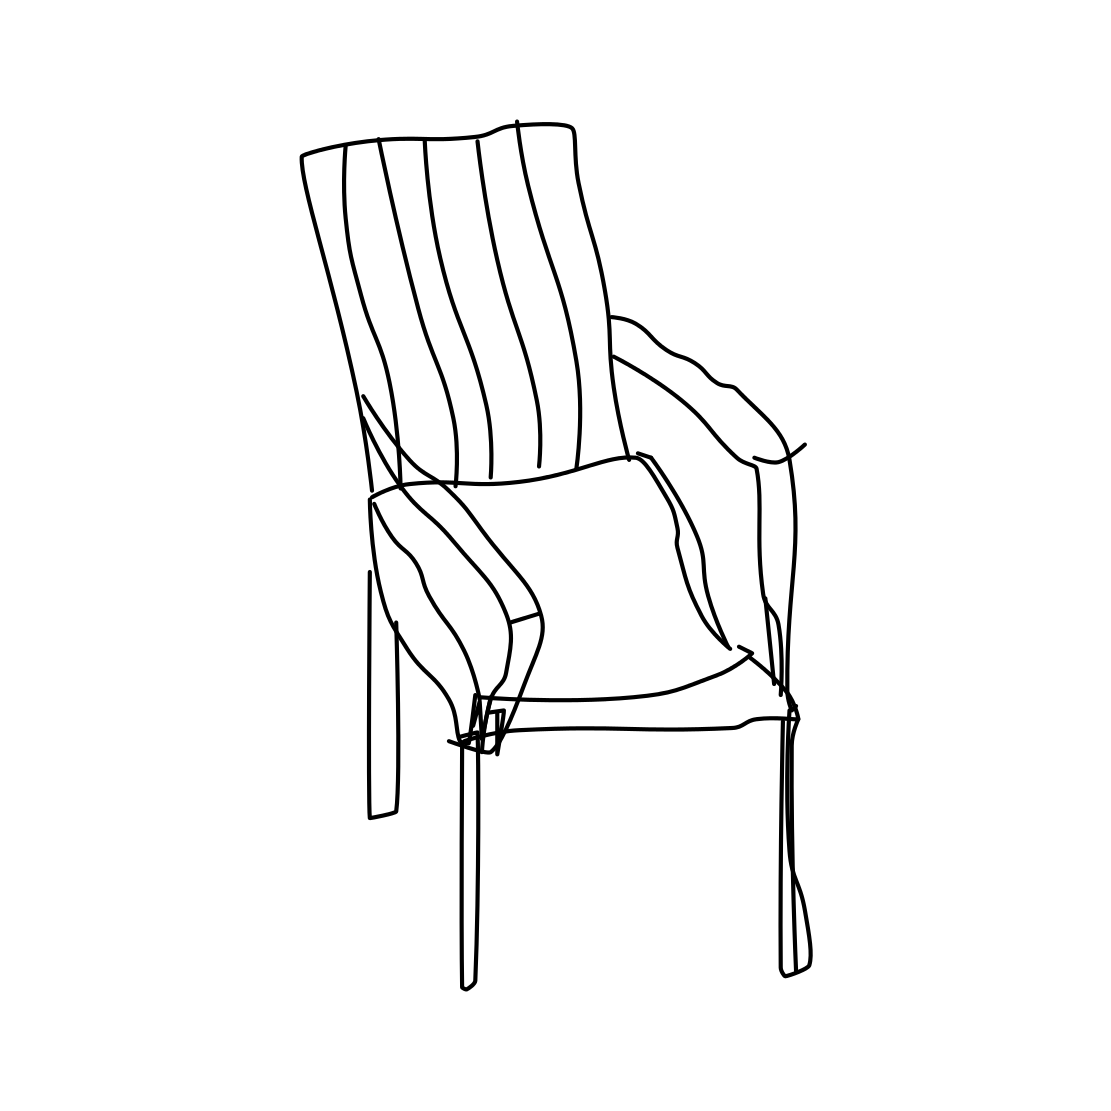

In [35]:
import re 
import base64
from PIL import Image
from io import BytesIO
import base64

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
im1 = Image.open('494.png')
im1 = im1.convert('RGB')
im1

In [36]:
# import the necessary packages
from keras.preprocessing import image as image_utils
# from imagenet_utils import decode_predictions
# from imagenet_utils import preprocess_input
# from vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np
import argparse
# import cv2
im1= im1.resize((img_width,img_height))
print("[INFO] loading and preprocessing image...")
image = img_to_array(im1)
image = image.reshape((1,) + image.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
test_ob = ImageDataGenerator(rescale=1./255)
X=[]
for batch in test_ob.flow(image, batch_size=1):
    X= batch
    break
X

[INFO] loading and preprocessing image...


array([[[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         ..., 
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

        [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         ..., 
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

        [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         ..., 
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.]]]])

In [40]:
## get top five prediction
from scipy import stats
pL = model.predict(X)
prob = model.predict_proba(X)

p= np.argsort(pL, axis=1)
n1 = (p[:,-5:]) #gives top 5 labels
pL_names = (encoder.inverse_transform(n1))
pL_names = pL_names[0]

p= np.sort(prob, axis=1)
convertperc = [stats.percentileofscore(p[0], a, 'rank') for a in p[0]]
n = (convertperc[-5:]) #gives top 5 probabilities perc
prob_values = (p[:,-5:])
prob_single_values = prob_values[0]
q= zip(pL_names,n,prob_single_values)

1/1 [==============================] - 0s


In [41]:
## print the top-5 predicting for image
q

[('bookshelf', 98.400000000000006, 6.0934822e-09),
 ('bench', 98.799999999999997, 2.9472238e-08),
 ('armchair', 99.200000000000003, 3.5627187e-07),
 ('chair', 99.599999999999994, 4.9882919e-07),
 ('bridge', 100.0, 2.3593977e-06)]